<center><img src="img/Marca-ITBA-Color-ALTA.png" width="250">

<h1>Master en Management & Analytics</h1>
</center>


## Clase 5 - Introducción a Clasificación y KNN

#### Referencias y bibliografía de consulta:

- Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido (O’Reilly) 2017
- An Introduction to Statistical Learning with Applications in R by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani (Springer) 2017 
- Python Machine Learning - Second Edition by Sebastian Raschka (Packt) 2017 
- https://scikit-learn.org/

## Introducción a algoritmos de clasificación

Cuando presentamos los diferentes algoritmos de machine learning, al hablar de algoritmos de **aprendizaje supervisado** mencionamos 2 tipos de algoritmos: los de **regresión** y los de **clasificación**.

Hasta ahora solamente vimos modelos de **regresión**, en los que nuestra variable objetivo era una variable continua y el modelo buscaba predecir su valor exacto.

Vamos a ver ahora los algoritmos de **clasificación**.

Como dijimos, este tipo de algoritmos también pertenecen a la familia de aprendizaje supervisado, por lo que en este caso también tendremos una variable objetivo. La diferencia con respecto a la regresión, es que en este caso nuestra **variable *target* es categórica**. 

El objetivo de nuestro modelo será predecir a cuál o cuáles clases pertenecen las observaciones.

Muy simplemente, podemos representarlo del siguiente modo:

<img src="img/clasificacion1.png" width="400">
<div class='epigraph' align="center"><i>Clasificación: una representación simple</i></div><br>

Ejemplos de problemas de clasificación son:

- Detección de fraudes
- Detección de enfermedades
- Clasificación de imágenes
- Análisis de sentimiento: detectar si los comentarios son positivos o negativos en RRSS
- Detección de Spam

Cuando nuestras observaciones están divididas solamente en dos clases, como *spam vs. no spam*, *fraude o no fraude*, decimos que estamos ante un problema de **clasificación binaria**. La imagen de arriba es un ejemplo de esto. 

Sin embargo, este es solamente el caso más simple de todos. Existe además la **clasificación multi-clase y multi-etiqueta**

<img src="img/clasificacion2.png" width="600">
<div class='epigraph' align="center"><i>Clasificación multi-clase y multi-etiqueta</i></div><br>


## Churn de una empresa de telecomunicaciones


Vamos a trabajar modelos de clasificación utilizando un [dataset de churn de una empresa de telecomunicaciones ficticia](https://www.kaggle.com/blastchar/telco-customer-churn). 


Cada fila representa un cliente, cada columna contiene los atributos del cliente.

El conjunto de datos incluye información sobre

- Clientes que se han dado de baja en el último mes - la columna se llama Churn.
- Servicios que cada cliente ha contratado: teléfono, líneas múltiples, Internet, seguridad en línea, copia de seguridad en línea, protección de dispositivos, soporte técnico y transmisión de TV y películas.
- Información de la cuenta del cliente: cuánto tiempo ha sido cliente, contrato, método de pago, facturación sin papel, cargos mensuales y cargos totales.
- Información demográfica sobre los clientes: sexo, rango de edad y si tienen pareja y personas a su cargo.

Más en detalle, las columnas son las siguientes:

* **customerID** : ID del cliente
* **gender**: Si el cliente es un hombre o una mujer
* **SeniorCitizen** : Si el cliente es una persona mayor o no (1, 0)
* **Partner** : Si el cliente tiene pareja o no (Yes, No)
* **Dependents** : Si el cliente tiene dependientes o no  (Yes, No)
* **tenure** : Número de meses que el cliente ha permanecido en la empresa
* **PhoneService** : Si el cliente tiene servicio telefónico o no (Yes, No)
* **MultipleLines** : Si el cliente tiene varias líneas o no (Yes, No, No phone service)
* **InternetService** : El proveedor de servicios de Internet del cliente (DSL, Fiber optic, No)
* **OnlineSecurity** : Si el cliente tiene seguridad en línea o no (Yes, No, No internet service)
* **OnlineBackup** : Si el cliente tiene copia de seguridad en línea o no (Yes, No, No internet service)
* **DeviceProtection** : Si el cliente tiene protección de dispositivos o no (Yes, No, No internet service)
* **TechSupport** : Si el cliente tiene soporte técnico o no (Yes, No, No internet service)
* **StreamingTV** : Si el cliente tiene o no televisión en streaming (Yes, No, No internet service)
* **StreamingMovies** : Si el cliente tiene películas en streaming o no (Yes, No, No internet service)
* **Contract** : La duración del contrato del cliente (Month-to-month, One year, Two year)
* **PaperlessBilling** : Si el cliente tiene facturación sin papel o no (Yes, No)
* **PaymentMethod** : El método de pago del cliente (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* **MonthlyCharges** : El importe cargado al cliente mensualmente
* **TotalCharges** : El importe total cobrado al cliente
* **Churn** : Si el cliente ha dejado la compañía (Yes or No)

Nuestra variable target es **Churn**.





### 1) Carga de los datos y primera inspección del dataset

Comencemos, como de costumbre, importando las librerías y el dataset.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.colors import ListedColormap
%matplotlib inline

import seaborn as sns
sns.set(style = 'white')

In [2]:
dataset = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Veamos la cantidad de filas y de columnas que tiene el dataset:

In [3]:
print('El dataset tiene {} filas y {} columnas'.format(dataset.shape[0],dataset.shape[1]))

El dataset tiene 7043 filas y 21 columnas


Veamos si tenemos datos nulos:

In [4]:
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Veamos los dtypes de todas las columnas:

In [5]:
dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Vamos a convertir la columna `TotalCharges` a un dtype numérico, porque esta casteado como string: 

In [6]:
dataset[dataset.TotalCharges== ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
dataset['TotalCharges'] = dataset['TotalCharges'].replace(" ", 0).astype('float64')

Veamos ahora cuáles son las posibles clases de las features categóricas:

In [8]:
for col in [c for c in dataset.columns if dataset[c].dtype=='object']:
    print('\nValores unicos de {}: {}'.format(col, dataset[col].unique()))


Valores unicos de customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Valores unicos de gender: ['Female' 'Male']

Valores unicos de Partner: ['Yes' 'No']

Valores unicos de Dependents: ['No' 'Yes']

Valores unicos de PhoneService: ['No' 'Yes']

Valores unicos de MultipleLines: ['No phone service' 'No' 'Yes']

Valores unicos de InternetService: ['DSL' 'Fiber optic' 'No']

Valores unicos de OnlineSecurity: ['No' 'Yes' 'No internet service']

Valores unicos de OnlineBackup: ['Yes' 'No' 'No internet service']

Valores unicos de DeviceProtection: ['No' 'Yes' 'No internet service']

Valores unicos de TechSupport: ['No' 'Yes' 'No internet service']

Valores unicos de StreamingTV: ['No' 'Yes' 'No internet service']

Valores unicos de StreamingMovies: ['No' 'Yes' 'No internet service']

Valores unicos de Contract: ['Month-to-month' 'One year' 'Two year']

Valores unicos de PaperlessBilling: ['Yes' 'No']

Valores unicos de PaymentMethod: ['Electron

Veamos ahora algunos estadísticos de las variables numéricas:

In [9]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### 2) Análisis exploratorio de los datos (EDA)

Realicemos ahora un análisis exploratorio de los datos. 

Agradecemos el autor de la siguiente [notebook de Kaggle](https://www.kaggle.com/bandiatindra/telecom-churn-prediction) ya que vamos a utilizar parte de su código en este análisis. 

#### 2.1) Datos demográficos

En primer lugar, conozcamos el sexo, el rango de edad, si está en pareja y si tienen gente a cargo. 

**Distribución por sexos**: aproximadamente la mitad de los clientes de nuestro conjunto de datos son hombres, mientras que la otra mitad son mujeres.

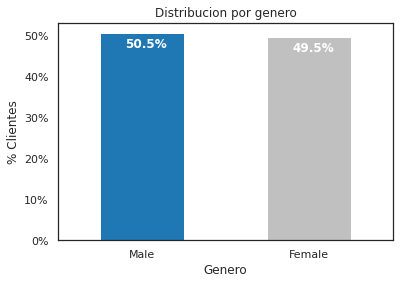

In [10]:
colors = ['#1f77b4','#C0C0C0']
ax = (dataset['gender'].value_counts()*100.0 /len(dataset)).plot(kind='bar',
                                                                 stacked = True,
                                                                 rot = 0,
                                                                 color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Clientes')
ax.set_xlabel('Genero')
ax.set_title('Distribucion por genero')

# creamos una lista para recolectar los datos del plt.patches
totals = []

# encontramos los valores y los appendeamos a la lista
for i in ax.patches:
    totals.append(i.get_width())

# creamos etiquetas para cada barra 
total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

**% Personas mayores** Sólo el 16% de los clientes son personas mayores. Por lo tanto, la mayoría de nuestros clientes en los datos son personas más jóvenes.

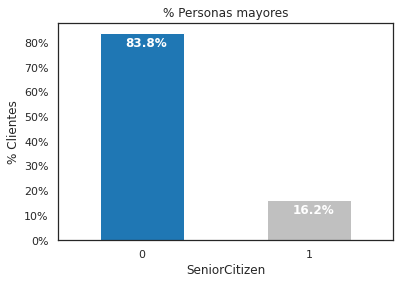

In [11]:
colors = ['#1f77b4','#C0C0C0']
ax = (dataset['SeniorCitizen'].value_counts()*100.0 /len(dataset)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Clientes')
ax.set_xlabel('SeniorCitizen')
ax.set_title('% Personas mayores')

# creamos una lista para recolectar los datos del plt.patches
totals = []

# encontramos los valores y los appendeamos a la lista
for i in ax.patches:
    totals.append(i.get_width())

# creamos etiquetas para cada barra 
total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-5.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

**Situación de la pareja y de las personas a cargo:** alrededor del 50% de los clientes tienen pareja, mientras que sólo el 30% del total de los clientes tienen personas a cargo.

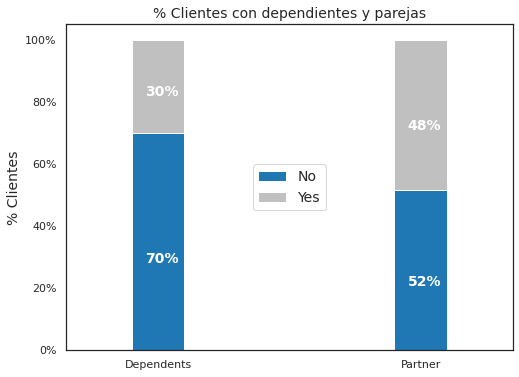

In [12]:
df2 = pd.melt(dataset, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(dataset)
colors = ['#1f77b4','#C0C0C0']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Clientes',size = 14)
ax.set_xlabel('')
ax.set_title('% Clientes con dependientes y parejas',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

#### 2.2) Información de la cuenta del cliente

**Antiguedad**: Después de observar el histograma siguiente, podemos ver que muchos clientes llevan sólo un mes en la empresa de telecomunicaciones, mientras que muchos llevan unos 72 meses. Esto podría deberse a que cada cliente tiene un contrato diferente. Por lo tanto, según el contrato que tengan, podría ser más o menos fácil para los clientes permanecer o abandonar la empresa de telecomunicaciones.

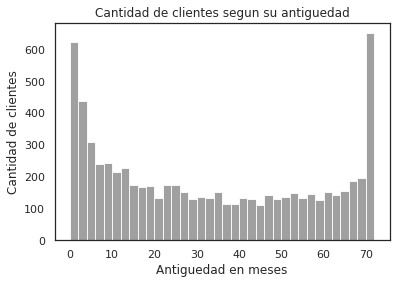

In [13]:
ax = sns.histplot(dataset['tenure'], kde=False, 
             bins=int(180/5), color = 'grey',
             kde_kws={'linewidth': 4})
ax.set_ylabel('Cantidad de clientes')
ax.set_xlabel('Antiguedad en meses')
ax.set_title('Cantidad de clientes segun su antiguedad');

**Contratos**: Para entender el gráfico anterior, vamos a ver primero el número de clientes por diferentes contratos.

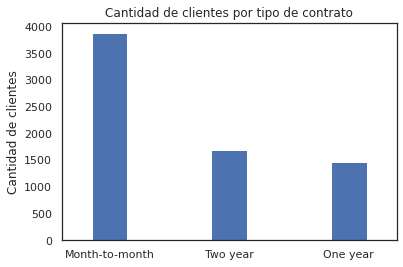

In [14]:
ax = dataset['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('Cantidad de clientes')
ax.set_title('Cantidad de clientes por tipo de contrato');

Como podemos ver en este gráfico, la mayoría de los clientes están en el contrato de mes a mes. Mientras que hay el mismo número de clientes con contratos de 1 y 2 años.

A continuación veremos la permanencia de los clientes en función de su tipo de contrato.

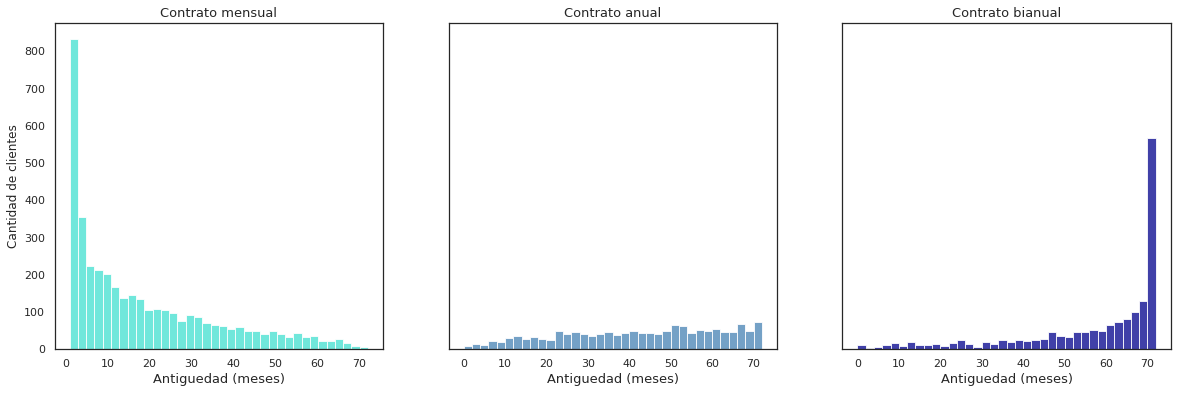

In [15]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.histplot(dataset[dataset['Contract']=='Month-to-month']['tenure'],
                   kde=False,
                   bins=int(180/5), color = 'turquoise',
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('Cantidad de clientes')
ax.set_xlabel('Antiguedad (meses)',size = 13)
ax.set_title('Contrato mensual',size = 13)

ax = sns.histplot(dataset[dataset['Contract']=='One year']['tenure'],
                   kde=False,
                   bins=int(180/5), color = 'steelblue',
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Antiguedad (meses)',size = 13)
ax.set_title('Contrato anual',size = 13)

ax = sns.histplot(dataset[dataset['Contract']=='Two year']['tenure'],
                   kde=False,
                   bins=int(180/5), color = 'darkblue',
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Antiguedad (meses)',size = 13)
ax.set_title('Contrato bianual',size = 13);

**Distribución de los servicios**

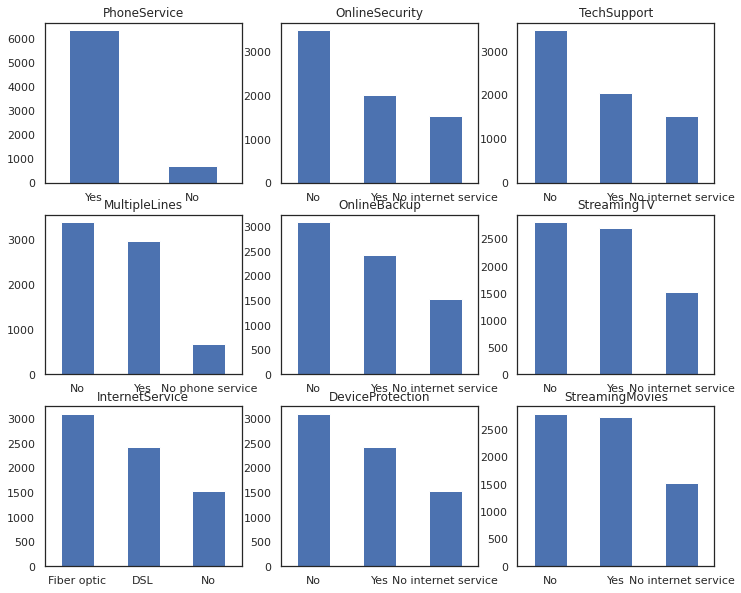

In [16]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (12,10))
for i, item in enumerate(services):
    if i < 3:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)


#### 2.3) Variable objetivo

Por último, echemos un vistazo a nuestra variable objetivo (Churn) y comprendamos su interacción con otras variables importantes.

Primero veamos el % de casos positivos de la variable objetivo:

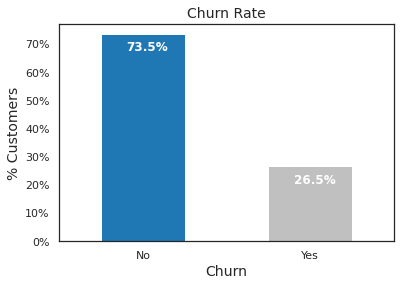

In [19]:
colors = ['#1f77b4','#C0C0C0']
ax = (dataset['Churn'].value_counts()*100.0 /len(dataset)).plot(kind='bar', stacked = True, rot = 0,color = colors, figsize = (6,4))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# creamos una lista para recolectar los datos del plt.patches
totals = []

# encontramos los valores y los appendeamos a la lista
for i in ax.patches:
    totals.append(i.get_width())

# creamos etiquetas para cada barra
total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-6.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
            weight = 'bold')
    

En nuestros datos, el 73,5% de los clientes no se dan de baja. Es evidente que los datos están sesgados, ya que cabría esperar que una gran mayoría de los clientes no se dieran de baja. Es importante tener esto en cuenta. Vamos a abordar este tema en profundidad en una próxima clase.

**Churn vs Antiguedad**: Como podemos ver en el siguiente gráfico, los clientes que no cambian de proveedor tienden a permanecer más tiempo en la empresa de telecomunicaciones. 

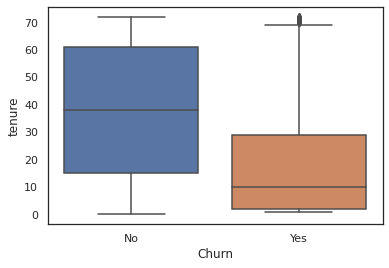

In [20]:
sns.boxplot(x = dataset.Churn, y = dataset.tenure);

**Churn por tipo de contrato**: los clientes que tienen un contrato mes a mes tienen una tasa de abandono muy alta.

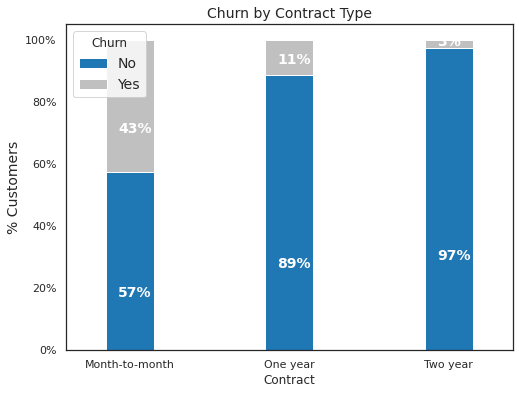

In [21]:
colors = ['#1f77b4','#C0C0C0']
contract_churn = dataset.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Agregamos la etiqueta a cada barra:
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.3*height),
                color = 'white',
               weight = 'bold',
               size = 14)

**Churn por edad**: las personas mayores tienen casi el doble de tasa de abandono que la población más joven.

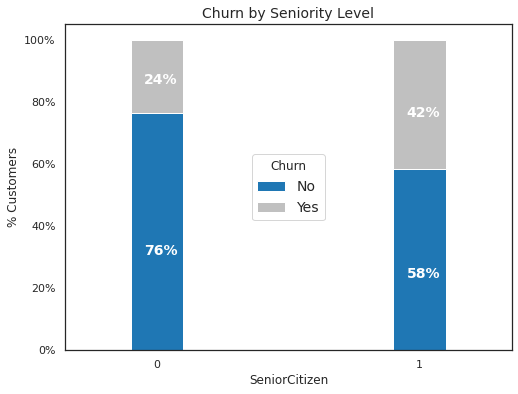

In [22]:
colors = ['#1f77b4','#C0C0C0']
seniority_churn = dataset.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

**Churn por cargos mensuales:** a mayor costos mensuales, mayor churn. 

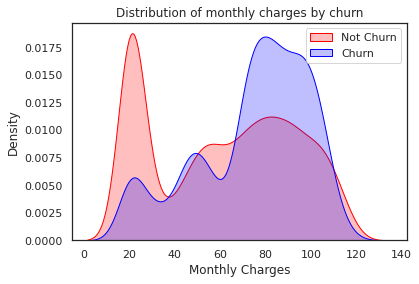

In [23]:
ax = sns.kdeplot(dataset.MonthlyCharges[(dataset["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(dataset.MonthlyCharges[(dataset["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn');

**Churn por cargos totales:** se observa que el churn se concentra más en clientes con cargos totales menores

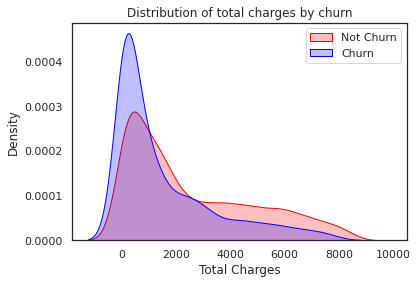

In [24]:
ax = sns.kdeplot(dataset.TotalCharges[(dataset["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(dataset.TotalCharges[(dataset["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn');

Grafiquemos ahora al churn en función de la antiguedad y de los cargos mensuales:

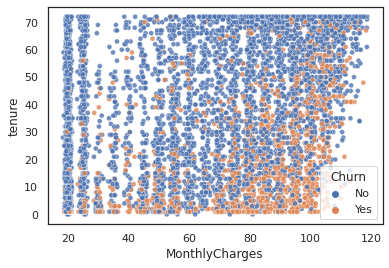

In [25]:
# Visualizamos los datos de entrenamiento
sns.scatterplot(x=dataset["MonthlyCharges"], \
                y=dataset["tenure"], hue=dataset["Churn"], alpha=0.8, s=25);

### 3) Limpieza y preprocesamiento de datos

Eliminamos la columna `customerID`:

In [26]:
dataset.drop('customerID', axis=1, inplace=True)

Creamos las variables dummy:

In [27]:
df_dummies = pd.get_dummies(dataset, drop_first=True)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


Corroboramos cuáles son las features del DataFrame y el tipo de datos:

In [28]:
df_dummies.dtypes

SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                uint8
Partner_Yes                                uint8
Dependents_Yes                             uint8
PhoneService_Yes                           uint8
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes                       uint8
TechSupport_No internet service            uint8
TechSupport_Yes                            uint8
StreamingTV_No inter

Creamos nuestra matriz de *features* y nuestro vector *target*:

In [29]:
y = df_dummies['Churn_Yes']
X = df_dummies.drop(columns = ['Churn_Yes'])

In [30]:
# Verificamos los shapes y los tipos de X e y:
print("Shape X:", X.shape)
print("Type X:", type(X))
print("Shape y:", y.shape)
print("Type y:", type(y))

Shape X: (7043, 30)
Type X: <class 'pandas.core.frame.DataFrame'>
Shape y: (7043,)
Type y: <class 'pandas.core.series.Series'>


Hacemos el split entre train y test sets.

In [31]:
from sklearn.model_selection import train_test_split

rs=15

X_train, X_test, y_train, y_test = \
                    train_test_split(X, y, stratify=y, test_size=0.25, random_state=rs)

Corroboramos los `shapes` de las matrices:

In [32]:
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (5282, 30)
y_train.shape:  (5282,)
X_test.shape:  (1761, 30)
y_test.shape:  (1761,)


Corroboramos que el set de entrenamiento y de testeo tengan el mimsmo % de observacione por clase. Esto se logra pasando el argumento `stratify=y` en `train_test_split`.

In [33]:
print('y:', y.value_counts(normalize=True).values)

print('y train:', y_train.value_counts(normalize=True).values)

print('y test:', y_test.value_counts(normalize=True).values)

y: [0.73463013 0.26536987]
y train: [0.73457024 0.26542976]
y test: [0.73480977 0.26519023]


##### Estandarización

En esta clase, vamos a entrenar el algoritmo **KNN (k vecinos más cercanos)** que requiere que estandaricemos a los datos. 

Apliquemos estandarización, aplicando el MinMaxScaler, que escala a los datos dentro del rango [0,1]

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, \
                           columns= X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, \
                           columns= X_test.columns)

In [35]:
X_train.min(axis=0)

SeniorCitizen                            0.0
tenure                                   0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
gender_Male                              0.0
Partner_Yes                              0.0
Dependents_Yes                           0.0
PhoneService_Yes                         0.0
MultipleLines_No phone service           0.0
MultipleLines_Yes                        0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
OnlineSecurity_No internet service       0.0
OnlineSecurity_Yes                       0.0
OnlineBackup_No internet service         0.0
OnlineBackup_Yes                         0.0
DeviceProtection_No internet service     0.0
DeviceProtection_Yes                     0.0
TechSupport_No internet service          0.0
TechSupport_Yes                          0.0
StreamingTV_No internet service          0.0
StreamingTV_Yes                          0.0
StreamingM

In [36]:
X_train.max(axis=0)

SeniorCitizen                            1.0
tenure                                   1.0
MonthlyCharges                           1.0
TotalCharges                             1.0
gender_Male                              1.0
Partner_Yes                              1.0
Dependents_Yes                           1.0
PhoneService_Yes                         1.0
MultipleLines_No phone service           1.0
MultipleLines_Yes                        1.0
InternetService_Fiber optic              1.0
InternetService_No                       1.0
OnlineSecurity_No internet service       1.0
OnlineSecurity_Yes                       1.0
OnlineBackup_No internet service         1.0
OnlineBackup_Yes                         1.0
DeviceProtection_No internet service     1.0
DeviceProtection_Yes                     1.0
TechSupport_No internet service          1.0
TechSupport_Yes                          1.0
StreamingTV_No internet service          1.0
StreamingTV_Yes                          1.0
StreamingM

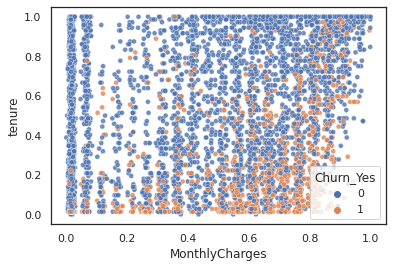

In [37]:
# Visualizamos los datos de entrenamiento
sns.scatterplot(x=X_train["MonthlyCharges"], \
                y=X_train["tenure"], hue=y_train, alpha=0.8, s=25);

### 4) Clasificación con KNN

Este modelo simplemente "mira" los K puntos del set de entrenamiento que están más cerca del input de la instancia sobre la cual se quiere realizar la predicción. Este método es un ejemplo de aprendizaje basado en memoria o en instancias.


  <div style="float:left;width: 85%;"><label><b>Más formalmente, KNN se encarga de calcular una probabilidad para cada clase <i>c</i>:</b>
      
$$ p(y = c|x, D, k) = \frac{1}{k} \sum_{i \in N_k(x, D)} I(y_i = c) $$
donde $x$ es el vector de _features_ del dato a predecir, $D$ es el conjunto de datos de entrenamiento, _k_ es la cantidad de vecinos a evaluar en $D$, $N_k(x, D)$ son los índices de los _k_ vecinos más cercanos e $I(y_i = c)$ es una función indicadora que se define como

$
I(e)=\left\{
            \begin{array}{ll}
              1\ si\ e\ es\ cierta\\
              0\ si\ e\ es\ falsa
            \end{array}
          \right.
$

La clase con mayor probabilidad es la que será predicha.


Importamos la clase `KNeighborsClassifier` de módulo neighbors

In [38]:
from sklearn.neighbors import KNeighborsClassifier

Al instanciar el modelo, hay 2 hiperparámetros importantes que definir:

- La cantidad de vecinos `n_neighbors`: a mayor cantidad de vecinos, más suave será la frontera de decisión creada. Cuantos menos vecinos, más compleja será la frontera, incrementando el riesgo de *overfitting*. Por default, la clase toma: n_neighbors=5
- Una métrica para calcular las `distancias`. Por default la clase usa la distancia euclídea (metric='minkowski' & p=2).


###### Métrica Minkowski

Una familia de métricas muy usada son las de Minkowski, en donde dado un parámetro $p$, la distancia entre dos puntos es

\begin{equation}
d_p(\vec{x_i},\vec{x_j})=\left( \sum_{k=1}^d \vert x_{ik}-x_{jk}\vert^{p}\right)^{\frac{1}{p}}
\end{equation}

en donde $\vec{x_i}$ es el dato i-ésimo representado como un vector de $d$ dimensiones (features). Cuando el parámetro es $p=2$ tenemos la distancia euclídea, que es la que se usa por defecto en la mayoría de los casos.



Como primer paso, hagamos un ejercicio de visualización. Vamos a entrenar varios KNN para diferentes valores de *k*, utilizando 2 *features*: `MonthlyCharges` y `tenure`. Veamos a medida que aumentamos el valor de *k* cómo se modifica la frontera decisión. 

Definamos primero una función que toma como argumento la matriz de features, la variable objetivo y *k*. Luego, entrena el modelo y plotea los datos de entrenamiento y la frontera de decisión.  

In [39]:
def knn2d(X, y , k):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X, y)
    
    # Definimos el tamaño de la figura
    plt.figure(figsize=(8,5))

    # Visualizamos los datos de entrenamiento
    sns.scatterplot(x=X['MonthlyCharges'], y=X['tenure'], hue=y, alpha=0.3, s=25)

    # Definimos una grilla de valores que abarcan todo el rango de cada variable
    x1_min, x1_max = X['MonthlyCharges'].min() - 0.01, X['MonthlyCharges'].max() + 0.01
    x2_min, x2_max = X['tenure'].min() - 0.01, X['tenure'].max() + 0.01
    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, .01), np.arange(x2_min, x2_max, .01))

    # Predecimos a partir de los valores de la grilla
    Z = knn.predict(np.c_[x1.ravel(), x2.ravel()])
    Z = Z.reshape(x1.shape)

    # Representamos las áreas de influencia de cada clase
    plt.pcolormesh(x1, x2, Z, cmap=ListedColormap(sns.color_palette(n_colors=2)), alpha=0.2)

    # Definimos los rótulos del gráfico
    plt.xlabel('$MonthlyCharges$', fontsize=15)
    plt.ylabel('$tenure$', fontsize=15)
    plt.title('Fronteras de decision, k={}'.format(k), fontsize=15)
    

Veamos la frontera de decisión para k = 1, 5, 10 y 100.

/home/ari/miniconda3/envs/itba/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/ari/miniconda3/envs/itba/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/ari/miniconda3/envs/itba/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/ari/miniconda3/envs/itba/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


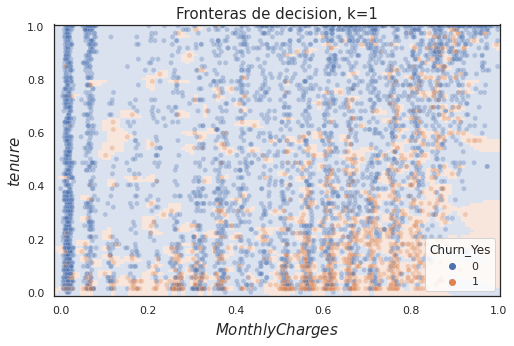

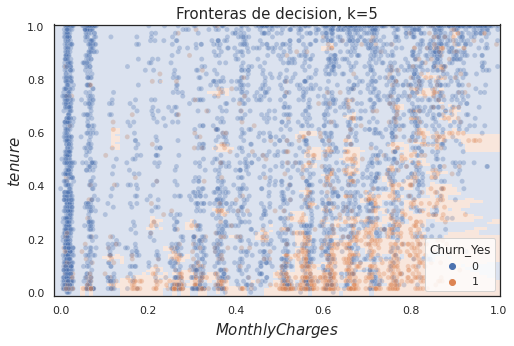

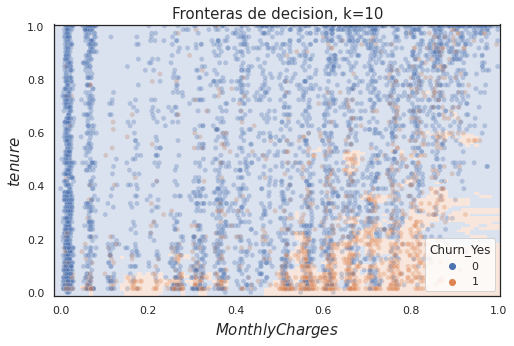

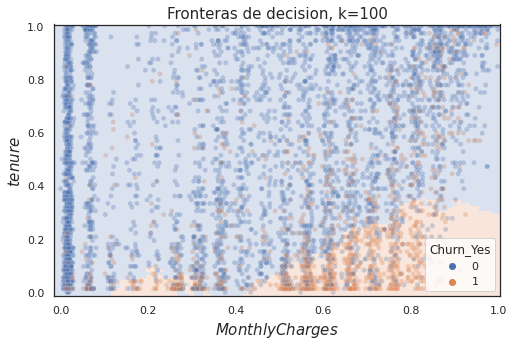

In [40]:
for k in [1, 5, 10, 100]:
    knn2d(X_train[['MonthlyCharges', 'tenure']], y_train , k)

Vemos como la frontera de decisión se hace más suave a medida que se incrementa la cantidad de vecinos. 

Con K=100 vemos que la frontera de decisión se hace razonable. Realicemos una primera prueba con K=100 y luego veamos de optimizar el modelo. 

In [41]:
knn_100 = KNeighborsClassifier(n_neighbors=100)

knn_100.fit(X_train, y_train)

y_pred_train = knn_100.predict(X_train)

y_pred_test = knn_100.predict(X_test)

Calculamos el accuracy, es decir la proporción de predicciones correctamente realizadas, sea para el set de entrenamiento que para el set de testeo:

In [42]:
from sklearn.metrics import accuracy_score
print('Accuracy en el set de entrenamiento = {:.4f}'.format(accuracy_score(y_train, \
                                                                       y_pred_train)))

print('Accuracy en el set de testeo = {:.4f}'.format(accuracy_score(y_test, \
                                                                       y_pred_test)))

Accuracy en el set de entrenamiento = 0.7984
Accuracy en el set de testeo = 0.7876



### 4) Optimización del algoritmo

Instanciamos el clasificador y definimos la grilla de hiperparámetros:

In [43]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

# Definimos el espacio de búsqueda de hiperparámetros con un diccionario:
param_grid = {'n_neighbors':[40, 50, 60, 100],
              'p': [1, 2],
              'weights': ['uniform', 'distance']}

print(param_grid)

{'n_neighbors': [40, 50, 60, 100], 'p': [1, 2], 'weights': ['uniform', 'distance']}


Definimos la estrategia de validación cruzada. 

En este caso, en lugar de pasarle directamente a Gridsearch el valor de la cantidad de particiones, le vamos a pasar un objeto de la clase [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) que genera sets de testeo con distribuciones de clase iguales o lo más similares posibles. 

In [44]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=12)

In [45]:
grid = GridSearchCV(knn, param_grid, cv=skf, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=12, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [40, 50, 60, 100], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [46]:
print(grid.best_estimator_)
print(grid.best_score_)
print(grid.best_params_)

KNeighborsClassifier(n_neighbors=50, p=1)
0.7940132163642097
{'n_neighbors': 50, 'p': 1, 'weights': 'uniform'}


In [47]:
y_pred_train = grid.predict(X_train)
print ('Accuracy:', accuracy_score(y_train,y_pred_train).round(4))

y_pred_test = grid.predict(X_test)
print ('Accuracy:', accuracy_score(y_test,y_pred_test).round(4))

Accuracy: 0.8042
Accuracy: 0.8007


### ¡Muchas gracias por la atención!